<a href="https://colab.research.google.com/github/jrg94/CSE5522/blob/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 5522 - Lab 1
By Jeremy Grifski

In this lab, we'll be taking a look at two different types of regressions: linear and logistic. In this first part, we'll be looking at linear regressions on gene expression. Meanwhile, in the second part, we'll be looking at logistic regressions on basketball players. 

## Part 1 - Linear Regression for Gene Expression Prediction

In this portion of the lab, we were asked to run a linear regression over 21 features of micro RNA to predict mRNA. In a later portion of this section, we were also asked to bump up the number of overall features to include dummie variables for tissue types.

**1.0**: Set up the environment. 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**1.1** Read the data from GitHub into a pandas dataframe. 

In [0]:
micro_rna_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
micro_rna_dataframe = pd.read_csv(micro_rna_data_url, index_col=0) # Removes the index column
mrna_well_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mrna_well_dataframe = pd.read_csv(mrna_well_data_url, index_col=0, header=None, skiprows=1).T
mrna_poor_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mrna_poor_dataframe = pd.read_csv(mrna_poor_data_url, index_col=0, header=None, skiprows=1).T
tissue_types_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/cancerType-x-Categorical.csv'
tissue_types_dataframe = pd.read_csv(tissue_types_data_url, index_col=0)

**1.2** Print out the top of the dataframe to make sure that the data loaded correctly.

In [215]:
micro_rna_dataframe.head()

,MIRC1,MIRC2,MIRC3,MIRC4,MIRC5,MIRC6,MIRC7,MIRC8,MIRC9,MIRC10,MIRC11,MIRC12,MIRC13,MIRC14,MIRC15,MIRC16,MIRC17,MIRC18,MIRC19,MIRC20,MIRC21
1,5.453767,4.383828,3.216983,3.428224,7.308519,5.509137,5.515894,3.371819,6.036913,2.876100,8.064057,3.388470,3.931960,6.401138,6.571827,3.785073,5.201207,2.575824,3.977328,5.501027,4.756962
2,4.321988,3.986583,3.829885,4.502739,1.685509,5.206405,6.445237,3.465323,6.618933,2.851471,7.730359,2.738890,3.567882,4.360902,6.082557,3.343985,6.303041,3.140004,4.199990,5.224254,4.429511
3,4.089116,4.178590,3.393789,3.582799,8.103207,4.997112,5.359251,3.681484,6.373393,2.851890,8.934644,2.892689,3.132659,6.555559,6.559177,3.469511,5.373332,4.424949,3.138479,5.682007,4.403253
4,4.884692,4.061140,3.475111,4.017083,8.005837,5.491073,5.014364,4.300977,6.017040,2.834699,8.646215,3.163199,3.531044,6.908134,6.624755,3.833247,5.495557,4.954630,4.542415,5.469924,4.693171
5,4.053976,4.224208,3.801616,3.329253,9.208897,5.518924,5.534329,2.391842,6.183707,3.029387,7.351146,2.873874,3.305899,6.917566,6.138030,3.250404,5.502236,4.572714,2.677879,5.577007,4.290140


In [216]:
mrna_well_dataframe.head()

,SNORD88B,GRHL2,C1orf172,RAB25,ANKS4B,HNF4A,AP1M2,PKP3,STMN4,ESRP1,CDHR5,MEG3,PRSS8,OVOL2,SPINT1,TM4SF5,ELAVL3,FAM123A,ZDHHC22,MMD2,SH2D3A,C21orf131,NCAN,CRB3,CLDN4,CACNG7,C1orf210,KCNJ9,CLDN7,ATCAY,C2orf80,ATP6V1G2,ST14,SHISA7,ELF3
1,3.321928,3.389608,5.822470,3.389608,3.321928,3.321928,4.820266,3.321928,3.516129,4.744742,11.026446,13.639151,3.454255,3.454255,6.383480,3.321928,3.791033,3.389608,3.516129,3.887827,3.575458,3.321928,3.389608,3.933894,5.313939,3.321928,3.321928,3.321928,5.398508,3.840242,3.321928,5.547879,6.207130,3.454255,3.575458
2,3.321928,3.586549,3.586549,3.486444,3.321928,4.813443,3.634105,3.634105,3.433667,3.724759,11.313428,4.108299,9.012650,3.321928,7.532506,3.321928,3.378872,3.378872,3.433667,4.541440,5.285010,3.321928,3.486444,4.074223,6.461239,3.586549,3.321928,3.433667,5.254900,3.586549,3.321928,4.237097,6.810804,3.586549,4.003557
3,3.321928,3.938521,3.993221,3.321928,3.321928,3.938521,3.404971,3.557961,3.483493,3.557961,3.483493,13.089396,4.369124,3.404971,4.239367,3.321928,4.193385,3.321928,3.760753,3.938521,5.172736,3.321928,3.483493,3.760753,9.293219,3.404971,3.404971,3.483493,4.856000,3.557961,3.321928,5.635110,5.812894,3.938521,4.369124
4,3.321928,3.794208,4.985892,3.321928,3.623375,3.711319,3.529721,3.946937,3.872592,5.695660,3.623375,15.672826,3.794208,3.711319,6.619172,3.321928,6.810524,3.429562,5.436545,6.056265,6.970559,3.321928,4.381581,3.711319,5.717062,5.511952,3.429562,3.429562,5.462121,5.969756,3.321928,6.450540,6.537319,4.534068,5.511952
5,3.321928,3.321928,11.037026,3.400388,3.400388,6.225495,3.400388,3.321928,3.400388,3.321928,7.825508,14.555980,5.900582,3.321928,7.980390,3.321928,4.939118,3.321928,3.400388,4.912592,5.266850,3.321928,3.739103,6.159351,4.200292,3.321928,3.321928,3.321928,5.568135,3.321928,3.321928,3.677429,6.029603,3.321928,3.545548


In [217]:
mrna_poor_dataframe.head()

,NOBOX,SCGB1D4,RPL9,SPATA8,C2orf78,FAM138B,LCE3C,POU5F2,OR2D3,PABPC1P2,CATSPER4,FTHL17,OR5K1,SNORA3,IL13,C10orf122,SULT1C3,KRT38,TMPRSS12,C4orf11
1,3.321928,3.321928,7.556077,3.321928,3.321928,3.321928,3.321928,3.389608,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928
2,3.321928,3.321928,8.111351,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.586549,3.321928,3.321928,3.321928,3.321928,3.321928
3,3.321928,3.321928,8.297134,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.404971,3.404971,3.321928,3.321928,3.321928,3.993221,3.321928,3.321928,3.321928,3.321928,3.321928
4,3.321928,3.321928,8.482979,3.321928,3.529721,3.321928,3.321928,3.429562,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,6.718019,3.321928,3.321928,3.321928,3.321928,3.321928
5,3.321928,3.321928,11.794430,3.400388,3.321928,3.321928,3.321928,3.400388,3.321928,3.400388,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928


In [218]:
tissue_types_dataframe.head()

,cancerType
1,ACC
2,ACC
3,ACC
4,ACC
5,ACC


**1.3** Explore data shape

In [219]:
micro_rna_dataframe.shape

(8895, 21)

In [220]:
mrna_well_dataframe.shape

(8895, 35)

In [221]:
mrna_poor_dataframe.shape

(8895, 20)

In [222]:
tissue_types_dataframe.shape

(8895, 1)

**1.4** Explore data description

In [223]:
micro_rna_dataframe.describe()

,MIRC1,MIRC2,MIRC3,MIRC4,MIRC5,MIRC6,MIRC7,MIRC8,MIRC9,MIRC10,MIRC11,MIRC12,MIRC13,MIRC14,MIRC15,MIRC16,MIRC17,MIRC18,MIRC19,MIRC20,MIRC21
count,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000
mean,4.129920,4.765170,5.057100,4.097146,2.846338,4.797431,5.383079,3.425811,4.792121,3.453612,7.859492,2.851375,3.649230,4.651203,4.903554,4.026922,6.893040,5.199461,7.382938,5.445934,4.740501
std,1.099592,0.828207,0.987020,0.835212,1.521580,0.799616,0.874974,0.875548,0.977154,0.773364,0.882516,0.617543,0.837230,1.257902,0.913718,0.711169,1.036150,2.423279,2.677375,0.824836,0.775925
min,0.668085,1.305794,2.193773,0.728425,0.073645,2.380204,2.716960,1.086365,0.879080,1.117544,4.459917,0.899994,0.435114,0.672520,2.212343,1.447088,2.643597,1.193575,0.530771,1.428634,2.218998
25%,3.390396,4.331190,4.376916,3.567006,1.926821,4.272392,4.758908,2.866235,4.276781,2.910465,7.288990,2.447650,3.222392,3.737002,4.303779,3.517319,6.447339,3.579986,5.268867,5.119781,4.247824
50%,4.139365,4.829788,5.103757,4.090588,2.623955,4.695558,5.374751,3.242166,4.791324,3.379283,7.801186,2.822985,3.677365,4.569216,4.744346,3.947587,7.133301,4.226871,8.475008,5.482303,4.651004
75%,4.913180,5.327773,5.694544,4.596960,3.370140,5.217066,5.983875,3.750545,5.426297,3.904954,8.343808,3.220396,4.154977,5.542658,5.277193,4.510465,7.590129,5.691993,9.415745,5.900317,5.122929
max,7.923561,6.974327,8.134850,7.393546,9.563560,8.406599,8.029896,7.569143,8.414998,6.977404,11.898551,5.590978,6.459934,10.067625,8.956072,6.734989,9.154822,12.814622,12.092160,7.651443,7.945005


In [224]:
mrna_well_dataframe.describe()

,SNORD88B,GRHL2,C1orf172,RAB25,ANKS4B,HNF4A,AP1M2,PKP3,STMN4,ESRP1,CDHR5,MEG3,PRSS8,OVOL2,SPINT1,TM4SF5,ELAVL3,FAM123A,ZDHHC22,MMD2,SH2D3A,C21orf131,NCAN,CRB3,CLDN4,CACNG7,C1orf210,KCNJ9,CLDN7,ATCAY,C2orf80,ATP6V1G2,ST14,SHISA7,ELF3
count,8.895000e+03,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000
mean,3.321928e+00,8.155817,7.593661,8.785721,4.627285,5.378231,8.976169,8.860184,4.044450,9.361552,5.359268,6.365150,9.773930,6.348790,10.782612,4.534172,4.239040,3.894851,4.056129,3.704895,7.709817,3.585181,4.240817,7.642334,10.707382,3.914341,7.076422,3.824674,9.725093,4.468322,3.601279,5.252473,11.016779,4.015498,10.302955
std,3.286445e-13,3.178686,2.162151,3.414385,2.251971,3.201652,3.026656,3.212414,1.939588,3.152476,3.170327,2.448115,3.333205,2.019891,2.696889,2.391540,2.039951,1.627266,1.935259,1.385978,2.042799,1.061898,2.478874,2.121472,3.465986,1.798836,2.144705,1.398936,2.856072,2.449587,1.044203,1.856013,2.539577,1.584956,3.407289
min,3.321928e+00,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.456596,3.321928,3.321928
25%,3.321928e+00,3.827169,6.568491,4.138856,3.321928,3.321928,7.390474,5.492842,3.321928,7.868540,3.420213,4.570809,8.432295,3.791871,10.121418,3.321928,3.321928,3.321928,3.321928,3.321928,6.649594,3.321928,3.321928,7.091705,8.336141,3.321928,5.705131,3.321928,8.154926,3.321928,3.321928,4.087904,9.768306,3.380293,8.762381
50%,3.321928e+00,9.721445,8.584962,10.578029,3.380397,3.487615,10.362406,10.032601,3.382280,10.825702,3.616934,5.775633,11.172563,7.065259,11.868456,3.321928,3.434668,3.321928,3.398610,3.321928,8.352049,3.321928,3.445316,8.492150,12.129232,3.321928,7.871400,3.399144,10.862832,3.401125,3.321928,4.682478,11.992357,3.487332,11.465436
75%,3.321928e+00,10.602422,9.106035,11.346711,4.613274,6.889222,11.159029,11.314739,3.548504,11.592149,5.771523,7.415182,12.132662,7.976795,12.536744,3.958196,3.806989,3.466366,3.599824,3.321928,9.185166,3.321928,3.667188,9.067013,13.256996,3.391637,8.679830,3.539184,11.819972,3.889011,3.321928,5.645023,12.805950,3.726068,12.869153
max,3.321928e+00,13.214960,11.400681,13.952766,11.334583,14.143314,14.195280,15.187468,13.293996,13.750252,16.494252,16.003397,16.222350,10.315371,15.279120,15.933825,13.872720,11.958680,13.540386,11.930154,11.773909,10.807282,17.157491,11.553039,16.765540,11.635063,11.841375,11.694423,14.485464,14.530785,10.079880,13.195618,15.532057,11.369453,15.908748


### Subproblem 1 - Computer R<sup>2</sup> and RMSE Mean and Standard Deviation

**1.5** Import linear regression library from scikit.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

**1.6** Setup x (microRNA features) and y (mRNA targets) values for regression. *Proof of concept*: let's try a single target value for now (SNORD88B).

In [226]:
x = micro_rna_dataframe.values
print(f'Micro RNA Features:\n {x}')
y = mrna_well_dataframe["SNORD88B"].values
print(f'mRNA Target Value SNORD88B:\n {y}')

Micro RNA Features:
 [[5.45376694 4.3838276  3.2169834  ... 3.97732759 5.50102704 4.75696249]
 [4.32198812 3.98658259 3.82988503 ... 4.19998992 5.22425381 4.42951072]
 [4.08911559 4.17859005 3.39378873 ... 3.1384791  5.68200738 4.40325252]
 ...
 [3.02645513 4.1710086  4.45773238 ... 2.69657029 4.73838707 5.70546468]
 [2.72775755 4.33952219 4.56746271 ... 3.01168894 5.60531597 5.87649015]
 [2.41979846 4.25275134 4.75874578 ... 2.74892305 5.13766053 6.12771056]]
mRNA Target Value SNORD88B:
 [3.32192809 3.32192809 3.32192809 ... 3.32192809 3.32192809 3.32192809]


**1.7** Split data 80/20 and run linear regression.

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
r = LinearRegression()  
r.fit(x_train, y_train)
y_prediction = r.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
df.head()

,Actual,Predicted
0,3.321928,3.321928
1,3.321928,3.321928
2,3.321928,3.321928
3,3.321928,3.321928
4,3.321928,3.321928


**1.8** Let's take a look at some of the metrics. In particular, R<sup>2</sup> and RMSE.

In [228]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print(f'RMSE: {rmse}; R2: {r2}') # Notice how error is essentially zero, so we have a perfect prediciton

RMSE: 0.0; R2: 1.0


**1.9** Turns out SNORD88B is extremely stable. In other words, it's fairly easy to predict regardless of which features we choose. Let's try creating an experiment for all target values.



In [0]:
def experiment(features, targets):
  rmse_list = []
  r2_list = []
  for _ in range(10):
    y = targets.values
    x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2)
    r = LinearRegression()  
    r.fit(x_train, y_train)
    y_prediction = r.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
    rmse_list.append(rmse)
    r2 = metrics.r2_score(y_test, y_prediction)
    r2_list.append(r2)
  return {
      "rmse_avg": np.average(rmse_list),
      "rmse_std": np.std(rmse_list), 
      "r2_avg": np.average(r2_list),
      "r2_std": np.std(r2_list)
  }

In [0]:
def compute_experiment_error(features, targets):
  error_columns = {}
  for column in targets:
    error = experiment(features, targets[column])
    error_columns[column] = error
  return error_columns

**1.10** Great! Now, we can quickly iterate over every column and report the average mean and rmse.

In [0]:
well_error = compute_experiment_error(x, mrna_well_dataframe)
poor_error = compute_experiment_error(x, mrna_poor_dataframe)

### Subproblem 2 - Visualize Error

**1.11** Time to visualize the error between the two target sets.

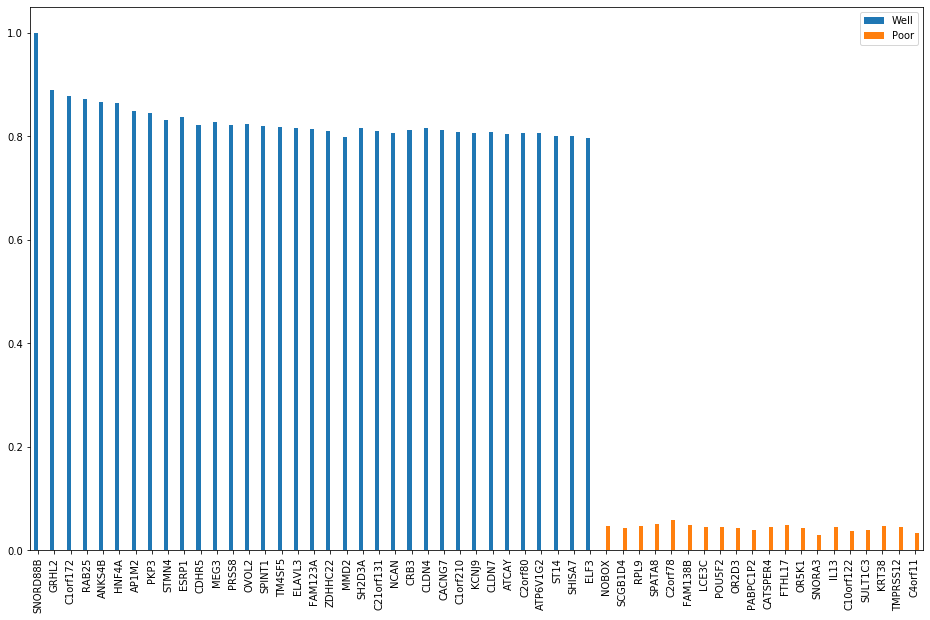

In [232]:
well_r2_dataframe = pd.DataFrame.from_dict(well_error).T["r2_avg"]
poor_r2_dataframe = pd.DataFrame.from_dict(poor_error).T["r2_avg"]
r2_dataframe = pd.DataFrame([well_r2_dataframe, poor_r2_dataframe]).T
r2_dataframe.columns = ["Well", "Poor"]
r2_dataframe.plot(kind='bar',figsize=(16,10))

Here, we can see that the R<sup>2</sup> value for the well expressed genes is much higher than the poorly expressed genes. In other words, the 21 features more clearly fit the well expressed genes on average. 



**1.12** That said, I think we can get an even more convincing plot by computing the average of all R<sup>2</sup> values for each set.

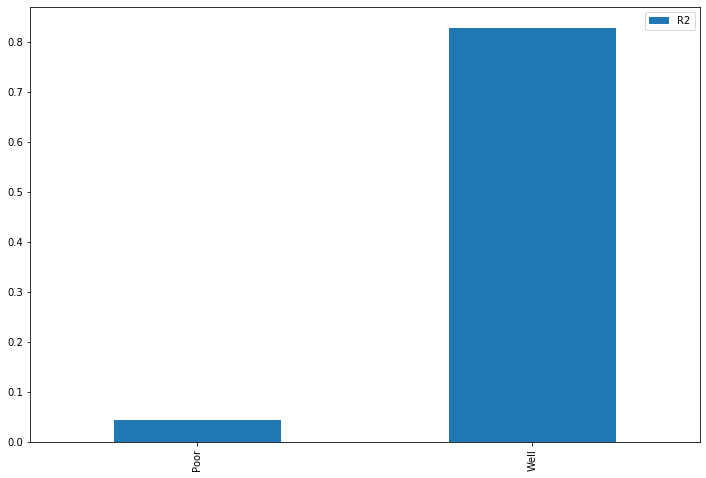

In [233]:
well_r2_avg = np.average(well_r2_dataframe.values)
poor_r2_avg = np.average(poor_r2_dataframe.values)
avg_dict = {
    "R2": {
        "Well": well_r2_avg,
        "Poor": poor_r2_avg
    }
}
pd.DataFrame.from_dict(avg_dict).plot(kind='bar',figsize=(12,8))

### Subproblem 3 - Introduce Categorical Variable

**1.13** At this point, we can introduce another categorical variable, tissue type. To do that, we'll need to treat the feature as a dummy variable: either 0 or 1. According to the assignment, we'll need 32 columns for our 33 tissues. 

In [234]:
dummies = pd.get_dummies(tissue_types_dataframe)  # Generates dummies for us
dummies.head()

,cancerType_ACC,cancerType_BLCA,cancerType_BRCA,cancerType_CESC,cancerType_CHOL,cancerType_COAD,cancerType_DLBC,cancerType_ESCA,cancerType_GBM,cancerType_HNSC,cancerType_KICH,cancerType_KIRC,cancerType_KIRP,cancerType_LGG,cancerType_LIHC,cancerType_LUAD,cancerType_LUSC,cancerType_MESO,cancerType_OV,cancerType_PAAD,cancerType_PCPG,cancerType_PRAD,cancerType_READ,cancerType_SARC,cancerType_SKCM,cancerType_STAD,cancerType_TGCT,cancerType_THCA,cancerType_THYM,cancerType_UCEC,cancerType_UCS,cancerType_UVM
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**1.14** At this point, we can try appending this data to our existing data and rerun our experiments.

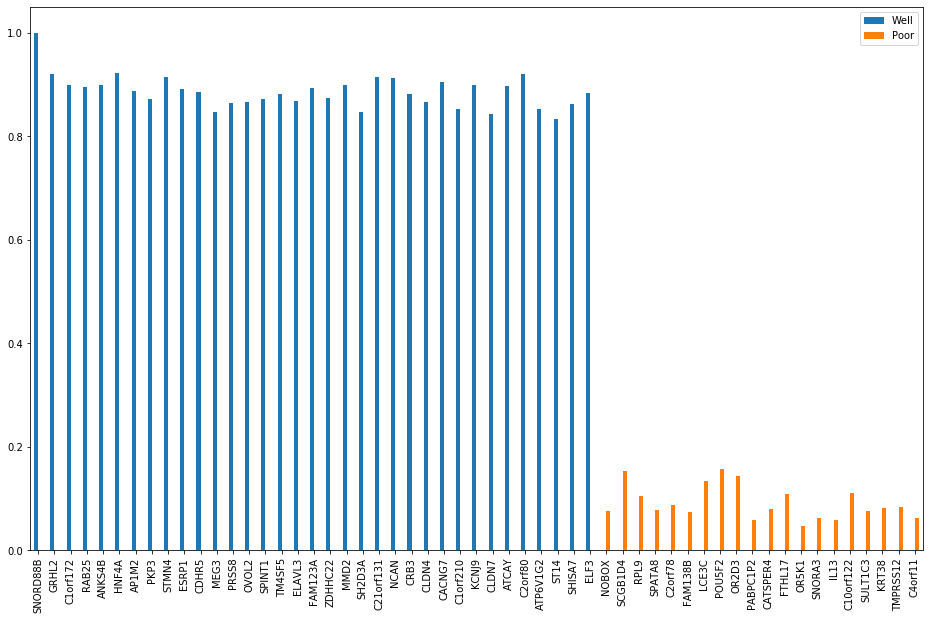

In [235]:
x = pd.concat([micro_rna_dataframe, dummies], axis=1)
  
well_error = compute_experiment_error(x, mrna_well_dataframe)
poor_error = compute_experiment_error(x, mrna_poor_dataframe)

well_r2_dataframe = pd.DataFrame.from_dict(well_error).T["r2_avg"]
poor_r2_dataframe = pd.DataFrame.from_dict(poor_error).T["r2_avg"]
r2_dataframe = pd.DataFrame([well_r2_dataframe, poor_r2_dataframe]).T
r2_dataframe.columns = ["Well", "Poor"]
r2_dataframe.plot(kind='bar',figsize=(16,10))

Here, it seems like the additional features improved the R<sup>2</sup> for just about every possible target value. I suspect the additional categorical feature data is causing some overfitting. That said, prediction performance appears to have improved overall.

## Part 2 - Logistic Regression

In this portion of the lab, we were asked to modify the hands-on lab to support logistic regression. In other words, modify the gradient descent code to support logistic functions rather than linear functions. 

**2.0** Set up the environment.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

**2.1** Read the data from GitHub into a pandas dataframe.

In [0]:
basketball_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/height_vs_weight.csv'
basketball_dataframe = pd.read_csv(basketball_data_url)

**2.2** Print out the top of the dataframe to make sure that the data loaded correctly.

In [238]:
basketball_dataframe.head()

,height,weight,female,basketball
0,74.8,221.2,0,1
1,65.6,147.3,1,1
2,74.8,166.8,0,0
3,68.5,174.1,0,0
4,66.8,156.6,1,0


### Subproblem 1 - Train Model for Height

**2.3** Take a look at the data. 

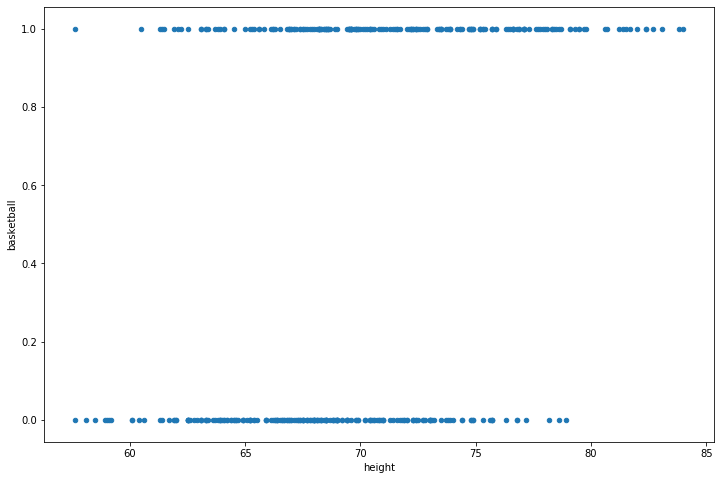

In [239]:
basketball_dataframe.plot(x="height", y="basketball", kind="scatter", figsize=(12,8))

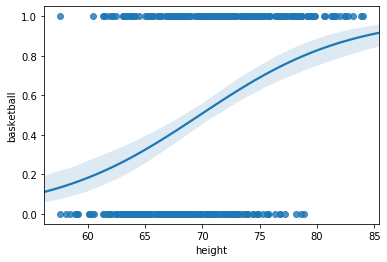

In [240]:
# Let's take a look at the expected logistic curve using seaborn
sns.regplot(x='height', y='basketball', data=basketball_dataframe, logistic=True) 

**2.4** Select Height and Basketball Columns and construct our test and training sets. 

In [0]:
height = np.array(basketball_dataframe['height'], dtype='float').reshape(-1, 1)
basketball = np.array(basketball_dataframe['basketball'], dtype='float').reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(height, basketball.ravel(), test_size=0.2, random_state=7)

**2.5** Now, let's borrow some code from the hands-on, and adjust it for the logistic regression.

In [0]:
def computeMSEBatchGradient(weights, features, targets):
  """
  Computes the average gradient over the batch of features.

  :param weights: vector of weights (univariate linear = 2 weights)
  :param features: vector (or matrix) of feature values
  :param targets: vector of target values, same length as features
  :returns: vector of gradient values
  """
  predictions = features * weights[1] + weights[0]
  sigmoid = 1 / (1 + np.exp(-1 * predictions))
  errors= targets - sigmoid
  gradient=np.array([-2.0 * np.average(errors), -2.0 * np.average(features * errors)])
  
  return gradient

In [0]:
def computeGradientDescentWeightUpdate(weights, features, targets, learning_rate):
  """
  Updates weights by computing gradient.

  :param weights: vector of weights (univariate linear = 2 weights)
  :param features: vector (or matrix) of feature values
  :param targets: vector of target values, same length as features
  :param learning_rate: a scalar for adjusting corrections in error
  """

  gradient = computeMSEBatchGradient(weights, features, targets)
  weights = weights - learning_rate * gradient

  return weights

**2.6** Let's run our experiment!

In [309]:
# naively selected the same weights and learning rate from the linear regression hands-on
weights = [20000.,150.]
learning_rate = 0.0001

def run(weights, features, targets, learning_rate):
  for step in range(10000):
    weights = computeGradientDescentWeightUpdate(weights, features, targets, learning_rate)
    if (step % 1000 == 0):
      print(weights)
  print(weights)
  return weights

final_weights = run(weights, x_train, y_train, learning_rate)

[19999.99990313   149.99323392]
[19999.90302813   143.22715091]
[19999.80615313   136.4610679 ]
[19999.70927813   129.69498489]
[19999.61240313   122.92890189]
[19999.51552813   116.16281888]
[19999.41865313   109.39673587]
[19999.32177813   102.63065286]
[19999.22490313    95.86456985]
[19999.12802813    89.09848685]
[19999.03125001    82.33916992]


**2.7** Get some sample weights for comparison with our own model.

In [0]:
regression = LogisticRegression()
regression.fit(x_train, y_train)
predictions = regression.predict(x_test)

In [311]:
regression.coef_  # slope

array([[0.13487366]])

In [312]:
regression.intercept_  # intercept

array([-9.342453])

**2.8** Let's try toying with the learning rates for the two parameters with a new definition of the run function.

In [313]:
epsilon = 0.00000001
def run(weights, features, targets, learning_rate):
  for step in range(1000000):
    prev_weights = weights
    weights=computeGradientDescentWeightUpdate(weights, features, targets, learning_rate)
    avg_gradient=(weights-prev_weights) / learning_rate
    if (np.linalg.norm(avg_gradient) < epsilon):
      break
    if (step % 1000 == 0):
      print(weights)
  print(weights)
  return weights

#weights = [2000., 50.]
learning_rate = [2.1, .0003]
final_weights = run(weights, x_train, y_train, learning_rate)

[19997.965625     149.97970175]
[17963.590625     129.68145273]
[15929.215625    109.3832037]
[13894.840625      89.08495468]
[11860.465625      68.78670566]
[9826.090625     48.48845663]
[7791.715625     28.19020761]
[5757.340625      7.89195859]
[3722.965625    -12.40629044]
[2026.31652948  -29.05505255]
[1971.73543193  -28.32323891]
[1919.31039533  -27.56998605]
[1866.88550546  -26.81673692]
[1814.46076299  -26.06349206]
[1762.03616794  -25.31025209]
[1709.61171981  -24.55701772]
[1657.18741767  -23.80378977]
[1604.76326044  -23.05056915]
[1552.3392473  -22.2973569]
[1499.91537821  -21.54415419]
[1447.49165473  -20.79096236]
[1395.06808103  -20.03778289]
[1342.64466529  -19.28461746]
[1290.22142145  -18.53146796]
[1237.79837135  -17.77833648]
[1185.37554752  -17.02522537]
[1132.95299641  -16.27213725]
[1080.53078242  -15.51907504]
[1028.10899267  -14.76604202]
[975.68774291 -14.01304185]
[923.26718476 -13.26007869]
[870.84751523 -12.50715728]
[818.42898938 -11.75428309]
[766.0119386

**2.9** Looks great! 